# G-LOC Detector v0.1.1

## Initital Training & Developement

**-- 2:17 18 Dec 2017**

I'm going to start this off at one-quarter size and increase to half-size (unsolved Memory issue for full-size), using my just-developed validation-by-subfolder function to make sure the validation and trainint sets have different people in them.

The previous version had severe overfitting due to the same people being in both sets.

I haven't decided whether to train Conv-Layers. I think I'll save 4 versions to compare their results:
* FU-FU
* FU-FF
* FF-FU
* FF-FF

Quarter-Half; F: Frozen; U:Unfrozen (Conv-trained)

### Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai_lin.imports import *
from fastai_lin.conv_learner import *
from fastai_lin.model import *
from fastai_lin.torch_imports import *

from utils.subfolder_val_loader import *

### Dataloader & Learner Initialization

In [2]:
PATH = 'data/'
TRAIN= PATH + 'train/'
label_csv = f'{PATH}labels.csv'

In [3]:
val_idxs = set_cv_idxs(label_csv, val_pct=0.2, thresh=0.05, seed=0)

In [4]:
len(val_idxs)

7062

In [5]:
arch = resnet34
size = 100

In [27]:
def set_data(size, arch=resnet34, test_name=None):
    tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=32, tfms=tfms, 
                                        suffix='.jpg', val_idxs=val_idxs, num_workers=8,
                                        test_name=test_name)
#     data.resize(int(size), 'tmp')
    return data

In [7]:
data = set_data(size)
data.resize(int(size), 'tmp')
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

### Working on Overfitting

#### ResNet34

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  3%|▎         | 33/1062 [00:03<01:59,  8.58it/s, loss=0.938]

  3%|▎         | 35/1062 [00:03<01:56,  8.85it/s, loss=0.933]

Exception in thread Thread-42:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 15%|█▌        | 160/1062 [00:17<01:36,  9.34it/s, loss=0.875]


 27%|██▋       | 284/1062 [00:30<01:22,  9.41it/s, loss=0.769]


 38%|███▊      | 408/1062 [00:43<01:09,  9.42it/s, loss=0.579]


 50%|█████     | 533/1062 [00:56<00:56,  9.44it/s, loss=0.434]


 62%|██████▏   | 657/1062 [01:09<00:42,  9.44it/s, loss=0.576]


 74%|███████▎  | 782/1062 [01:22<00:29,  9.45it/s, loss=1.2] 


 76%|███████▋  | 810/1062 [01:25<00:26,  9.45it/s, loss=1.71]


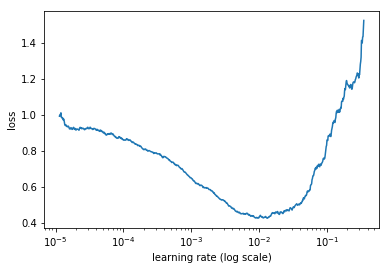

Exception in thread Thread-43:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [34]:
learner.lr_find()
learner.sched.plot()

In [17]:
λr = 5e-3

In [18]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


  1%|          | 13/1062 [00:01<02:21,  7.39it/s, loss=0.915]

  1%|▏         | 15/1062 [00:01<02:17,  7.63it/s, loss=0.916]

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.3442   0.99533  0.77418]                          
[ 1.       0.31949  1.13753  0.77899]                          
[ 2.       0.29547  1.16352  0.7664 ]                          

CPU times: user 15min 53s, sys: 2min, total: 17min 53s
Wall time: 6min 31s


Wow. `[ 2.       0.29547  1.16352  0.7664 ]  ` This isn't doing well is it. What if I reset the learner, and go straight for SGDR?

`Training Loss:   0.29547`

`Validation Loss: 1.16352`

If that doesn't work, I may have to start going for Dropout.

In [21]:
learner = ConvLearner.pretrained(arch, data)
λr /= 1.5

In [22]:
%time learner.fit(λr, n_cycle=2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.36006  0.82643  0.77955]                          
[ 1.       0.34025  1.00306  0.78153]                          
[ 2.       0.33084  0.86895  0.77955]                          

CPU times: user 15min 52s, sys: 1min 59s, total: 17min 52s
Wall time: 6min 30s


In [23]:
λr

0.0022222222222222222

In [25]:
learner = ConvLearner.pretrained(arch, data, ps=0.1)
λr = 1e-3

In [26]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.33152  0.88374  0.75636]                          
[ 1.       0.30284  1.00224  0.75735]                          
[ 2.       0.28836  1.04973  0.7599 ]                          

CPU times: user 15min 48s, sys: 1min 59s, total: 17min 48s
Wall time: 6min 30s


In [27]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.26702  1.05906  0.7377 ]                          
[ 1.       0.24902  1.05516  0.76145]                          
[ 2.       0.25373  1.12973  0.76414]                          
[ 3.       0.22269  1.23014  0.75042]                          
[ 4.       0.2283   1.21092  0.75099]                          
[ 5.       0.20911  1.21838  0.74929]                          
[ 6.       0.20842  1.14073  0.73812]                          

CPU times: user 36min 50s, sys: 4min 40s, total: 41min 30s
Wall time: 15min 12s


More dropout? If not, then maybe a different model.

In [28]:
learner = ConvLearner.pretrained(arch, data, ps=0.4)

In [29]:
λr

0.001

In [30]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.4189   0.73451  0.77814]                          

CPU times: user 5min 16s, sys: 39.3 s, total: 5min 55s
Wall time: 2min 10s


50% Dropout? 60% Dropout.

In [8]:
learner = ConvLearner.pretrained(arch, data, ps=0.6)
λr = 5e-4; λr

0.0005

In [9]:
%time learner.fit(lrs=λr, n_cycle=1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.49535  0.67192  0.7797 ]                          

CPU times: user 5min 16s, sys: 39.9 s, total: 5min 56s
Wall time: 2min 9s


`0.6719` is the best first-epoch validation loss I've seen so far.. This is using 60% Dropout.

In [10]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.45791  0.70315  0.77955]                          
[ 1.       0.46234  0.69669  0.77927]                          
[ 2.       0.42743  0.73879  0.77913]                          

CPU times: user 15min 50s, sys: 1min 59s, total: 17min 50s
Wall time: 6min 29s


In [11]:
%time learner.fit(lrs=λr, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.42452  0.72051  0.77927]                          
[ 1.       0.39918  0.7509   0.78083]                          
[ 2.       0.41261  0.74863  0.77913]                          
[ 3.       0.41383  0.72752  0.7787 ]                          
[ 4.       0.39898  0.76701  0.77842]                          
[ 5.       0.40612  0.77762  0.7787 ]                          
[ 6.       0.42363  0.76428  0.77842]                          

CPU times: user 36min 53s, sys: 4min 40s, total: 41min 33s
Wall time: 15min 10s


In [12]:
learner.save('100_d60')

In [13]:
%time learner.fit(lrs=λr/1.5, n_cycle=5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[ 0.       0.39841  0.78338  0.77814]                          
[ 1.       0.4147   0.80169  0.77856]                          
[ 2.       0.40193  0.79699  0.7787 ]                          
[ 3.       0.38513  0.78112  0.77658]                          
[ 4.       0.38388  0.80819  0.77743]                          
[ 5.       0.37999  0.79277  0.77842]                          
[ 6.       0.39063  0.82007  0.77828]                          
[ 7.       0.3759   0.80655  0.77743]                          
[ 8.       0.39165  0.83593  0.77772]                          
[ 9.       0.38027  0.82185  0.77687]                          
[ 10.        0.38575   0.81211   0.77757]                      
[ 11.        0.38599   0.79352   0.77743]                      
[ 12.        0.38919   0.8041    0.77701]                      
[ 13.        0.39858   0.82701   0.77786]                      
[ 14.        0.3882    0.82924   0.77701]                      
[ 15.        0.39165   0.82044   0.77715

In [14]:
learner.save('100_d60_01')

#### Weight Decay & Adam

In [16]:
learner = ConvLearner.pretrained(arch, data, opt_fn=optim.Adam)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 68%|██████▊   | 726/1062 [01:13<00:34,  9.81it/s, loss=1.68] 

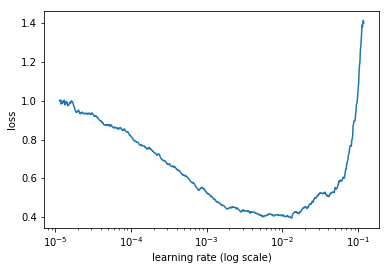

In [17]:
learner.lr_find()
learner.sched.plot()

In [21]:
λr = 1e-3
wd = 0.025

[AdamW optimizer for FastAI](http://forums.fast.ai/t/new-adamw-optimizer-now-available/8518/3)

In [22]:
learner.fit(lrs=λr, n_cycle=3, wds=wd, use_wd_sched=True, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))


  8%|▊         | 89/1062 [00:10<01:49,  8.87it/s, loss=0.791]

Exception in thread Thread-51:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
Exception in thread Thread-52:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set change

[ 0.       0.27862  1.01807  0.77121]                          
[ 1.       0.25874  1.23584  0.77772]                          
[ 2.       0.22822  1.12195  0.77347]                          
[ 3.       0.23751  1.11694  0.75467]                          
[ 4.       0.231    1.28023  0.77262]                          
[ 5.       0.20513  1.18205  0.764  ]                          
[ 6.       0.19699  1.26975  0.76301]                          



In [23]:
??learner.fit(lrs=λr, n_cycle=3, wds=wd, use_wd_sched=True, cycle_len=1, cycle_mult=2)

#### ResNeXt50

In [ ]:
arch = resnext50
learner = ConvLearner.pretrained()

### Quarter-Size Training

### Half-Size Training

### Testing

#### Adding an image to the test set

In [28]:
learner = set_data(size, test_name='test_z')

In [ ]:
predictions = learner.TTA(is_test=True)

In [44]:
os.listdir(PATH + 'test_z/')
# os.listdir(PATH + 'test_zjpg/')

['Screenshot 2017-12-17 18.19.35.png',
 'Screenshot 2017-12-14 19.12.04.png',
 'Screenshot 2017-12-14 19.12.29.png',
 'Screenshot 2017-12-14 19.12.36.png',
 'Screenshot 2017-12-14 19.12.59.png',
 'Screenshot 2017-12-14 19.12.13.png',
 'Screenshot 2017-12-14 19.11.51.png',
 'Screenshot 2017-12-14 19.12.19.png']

In [54]:
a = os.listdir(PATH + 'test_z/')
b = os.listdir(PATH + 'test_zjpg/')
for i,e in enumerate(a):
    a[i] = e.split('.png')[0]
for i,e in enumerate(b):
    b[i] = e.split('.jpg')[0]

for i in a:
    if i not in b:
        print(i)

Screenshot 2017-12-17 18.19.35


In [56]:
# resize and save png as jpg
impath = PATH + 'test_z/' + 'Screenshot 2017-12-17 18.19.35.png'
img = Image.open(impath)
img = np.asarray(img)
tfx = 400 / img.shape[1]
tfy = 400 / img.shape[0]    
img = cv2.resize(img, None, fx=tfx, fy=tfy)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite(PATH + 'test_zjpg/' + impath.split('/')[2].split('.png')[0] + '.jpg', img)

True

In [57]:
'Screenshot 2017-12-17 18.19.35.jpg' in os.listdir(PATH+'test_zjpg/')

True

#### Work

In [65]:
data = set_data(size, test_name='test_zjpg')
learner = ConvLearner.pretrained(arch, data)

In [68]:
λr /= 2; λr

0.0005

In [69]:
learner.fit(lrs=λr, n_cycle=2, wds=wd, use_wd_sched=True, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.4293   0.6523   0.77757]                          
[ 1.       0.38583  0.61534  0.7797 ]                          
[ 2.       0.39822  0.62711  0.77885]                          



In [76]:
predictions, _ = learner.TTA(is_test=True)

In [78]:
predictions.shape

(5, 7, 2)

In [81]:
predictions[4]

array([[-0.19551, -1.7283 ],
       [-0.2288 , -1.58715],
       [-0.19606, -1.72578],
       [-0.14265, -2.01785],
       [-0.25256, -1.49974],
       [-0.3647 , -1.18551],
       [-0.22642, -1.59643]], dtype=float32)

In [82]:
preds = np.mean(np.exp(predictions), 0)

In [83]:
preds

array([[ 0.77419,  0.22581],
       [ 0.78017,  0.21983],
       [ 0.7506 ,  0.2494 ],
       [ 0.78571,  0.21429],
       [ 0.75882,  0.24118],
       [ 0.73675,  0.26325],
       [ 0.76958,  0.23042]], dtype=float32)

In [87]:
len(os.listdir(PATH+'test_zjpg/'))

8

Alright. At this point I'm seriously thinking of rebuilding the entire dataset. Maybe having thousands of images that are extremely self similar is making it very hard for the algorithm to converge on a solution that doesn't involve memorization..

Because if you have 20 images side by side that look almost the same... Like.. you're not improving a dataset but just adding five copies of itself to it. If anything, it should make it harder to generalize no?

I have a hunch that that's what's going on here. I just got data from a 2-minute clip, and recorded 152 images. That seems.. right. Not 400 or 600 for a couple minute-long video. That means a lot more finger work but whatever.